In [47]:
import os
import cv2
import pandas as pd
import numpy as np
from IPython.display import Video
import mediapipe as mp
import matplotlib.pyplot as plt
from tqdm.notebook import tqdm


In [35]:
BASE_PATH = "."  

VIDEOS_PATH = os.path.join(BASE_PATH, "data", "Videos")
ANNOTATIONS_PATH = os.path.join(BASE_PATH, "data", "Text_Annotations")

In [36]:
print("📁 Checking paths...\n")
print(f"Videos path: {os.path.abspath(VIDEOS_PATH)}")
print(f"   Exists: {os.path.exists(VIDEOS_PATH)}")
print(f"\nAnnotations path: {os.path.abspath(ANNOTATIONS_PATH)}")
print(f"   Exists: {os.path.exists(ANNOTATIONS_PATH)}")


📁 Checking paths...

Videos path: /home/timo/Desktop/gesturedetect/data/Videos
   Exists: True

Annotations path: /home/timo/Desktop/gesturedetect/data/Text_Annotations
   Exists: True


In [37]:
video_extensions = ('.mp4', '.avi', '.mov', '.MOV', '.mkv')
videos = [f for f in os.listdir(VIDEOS_PATH) if f.endswith(video_extensions)]

print(f"📹 Found {len(videos)} videos:\n")
for i, v in enumerate(videos):
    print(f"  {i+1}. {v}")

📹 Found 12 videos:

  1. Anwin_Right_Swipe.mp4
  2. friend2_RH_Left_Swipe.mp4
  3. friend2_Right_Swipe.mp4
  4. Timmy_Left_Swipe.MOV
  5. Anwin_RH_Left_Swipe.mp4
  6. Timmy_rotate.MOV
  7. Friend1_Right_Swipe.mp4
  8. friend1_Rotate.mp4
  9. Timmy_Right_Swipe.MOV
  10. Anwin_Rotate.mp4
  11. friend2_Rotate.mp4
  12. friend1_RH_Left_Swipe.mp4


In [38]:
def video_to_dataframe(video_path, flip_image=False):
    """Extract pose landmarks from video using MediaPipe"""
    
    cap = cv2.VideoCapture(video_path)
    frames_data = []
    
    with mp_pose.Pose(
        min_detection_confidence=0.5,
        min_tracking_confidence=0.5
    ) as pose:
        
        while cap.isOpened():
            success, image = cap.read()
            if not success:
                break
            
            # Get timestamp
            timestamp_ms = cap.get(cv2.CAP_PROP_POS_MSEC)
            
            # Flip if needed
            if flip_image:
                image = cv2.flip(image, 1)
            
            # Process frame
            image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
            results = pose.process(image_rgb)
            
            # Extract landmarks
            frame_data = {'timestamp_ms': timestamp_ms}
            
            if results.pose_landmarks:
                for idx, landmark in enumerate(results.pose_landmarks.landmark):
                    name = POSE_LANDMARKS[idx]
                    frame_data[f'{name}_x'] = landmark.x
                    frame_data[f'{name}_y'] = landmark.y
                    frame_data[f'{name}_z'] = landmark.z
            
            frames_data.append(frame_data)
    
    cap.release()
    return pd.DataFrame(frames_data)

In [39]:
# Test on first video
test_video = os.path.join(VIDEOS_PATH, videos[0])
print(f"Testing: {videos[0]}\n")

df = video_to_dataframe(test_video)

print(f" Shape: {df.shape}")
print(f" Frames: {len(df)}")
print(f" Columns: {len(df.columns)}")

display(df.head())

Testing: Anwin_Right_Swipe.mp4



I0000 00:00:1766145473.964141  107385 gl_context_egl.cc:85] Successfully initialized EGL. Major : 1 Minor: 5
I0000 00:00:1766145474.020723  108856 gl_context.cc:357] GL version: 3.2 (OpenGL ES 3.2 NVIDIA 580.95.05), renderer: NVIDIA GeForce RTX 3050 Laptop GPU/PCIe/SSE2
W0000 00:00:1766145474.068591  108837 inference_feedback_manager.cc:114] Feedback manager requires a model with a single signature inference. Disabling support for feedback tensors.
W0000 00:00:1766145474.083423  108842 inference_feedback_manager.cc:114] Feedback manager requires a model with a single signature inference. Disabling support for feedback tensors.
/home/timo/Desktop/gesturedetect/env/lib/python3.12/site-packages/google/protobuf/symbol_database.py:55: UserWarning: SymbolDatabase.GetPrototype() is deprecated. Please use message_factory.GetMessageClass() instead. SymbolDatabase.GetPrototype() will be removed soon.
  warnings.warn('SymbolDatabase.GetPrototype() is deprecated. Please '


 Shape: (420, 100)
 Frames: 420
 Columns: 100


,timestamp_ms,NOSE_x,NOSE_y,NOSE_z,LEFT_EYE_INNER_x,LEFT_EYE_INNER_y,LEFT_EYE_INNER_z,LEFT_EYE_x,LEFT_EYE_y,LEFT_EYE_z,...,LEFT_HEEL_z,RIGHT_HEEL_x,RIGHT_HEEL_y,RIGHT_HEEL_z,LEFT_FOOT_INDEX_x,LEFT_FOOT_INDEX_y,LEFT_FOOT_INDEX_z,RIGHT_FOOT_INDEX_x,RIGHT_FOOT_INDEX_y,RIGHT_FOOT_INDEX_z
0,0.000000,0.443073,0.242841,-0.418584,0.450801,0.218361,-0.401053,0.455295,0.217945,-0.401218,...,0.338666,0.390682,1.187109,0.420861,0.489175,1.267799,0.197920,0.388439,1.248430,0.281684
1,33.333333,0.443071,0.243036,-0.446549,0.450784,0.218516,-0.425110,0.455322,0.218232,-0.425246,...,0.267698,0.390959,1.206808,0.403781,0.490290,1.286122,0.105838,0.388458,1.268647,0.243092
2,66.666667,0.443098,0.243851,-0.440588,0.450773,0.219137,-0.419951,0.455322,0.219103,-0.420098,...,0.238630,0.390944,1.222027,0.373843,0.493597,1.297477,0.075753,0.388768,1.282244,0.208480
3,100.000000,0.443128,0.245492,-0.444613,0.450742,0.220320,-0.423660,0.455271,0.220384,-0.423807,...,0.226009,0.392740,1.229474,0.363594,0.499823,1.304568,0.062234,0.392567,1.288380,0.197569
4,133.333333,0.443045,0.246871,-0.452119,0.450575,0.221461,-0.432429,0.455065,0.221567,-0.432568,...,0.260132,0.392619,1.231775,0.349431,0.501557,1.305926,0.105149,0.393202,1.293449,0.188051


I0000 00:00:1766145483.073814  107385 gl_context_egl.cc:85] Successfully initialized EGL. Major : 1 Minor: 5
I0000 00:00:1766145483.120647  108895 gl_context.cc:357] GL version: 3.2 (OpenGL ES 3.2 NVIDIA 580.95.05), renderer: NVIDIA GeForce RTX 3050 Laptop GPU/PCIe/SSE2
W0000 00:00:1766145483.165084  108878 inference_feedback_manager.cc:114] Feedback manager requires a model with a single signature inference. Disabling support for feedback tensors.
W0000 00:00:1766145483.179262  108882 inference_feedback_manager.cc:114] Feedback manager requires a model with a single signature inference. Disabling support for feedback tensors.
/home/timo/Desktop/gesturedetect/env/lib/python3.12/site-packages/google/protobuf/symbol_database.py:55: UserWarning: SymbolDatabase.GetPrototype() is deprecated. Please use message_factory.GetMessageClass() instead. SymbolDatabase.GetPrototype() will be removed soon.
  warnings.warn('SymbolDatabase.GetPrototype() is deprecated. Please '


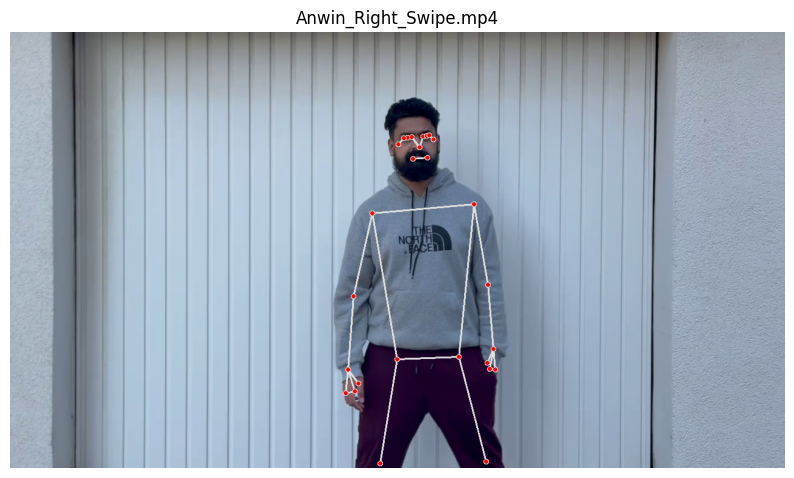

In [40]:
def show_pose_detection(video_path):
    """Show pose detection on middle frame"""
    
    cap = cv2.VideoCapture(video_path)
    
    # Go to middle frame
    total_frames = int(cap.get(cv2.CAP_PROP_FRAME_COUNT))
    cap.set(cv2.CAP_PROP_POS_FRAMES, total_frames // 2)
    
    success, image = cap.read()
    cap.release()
    
    if not success:
        print("Error reading video")
        return
    
    # Detect pose
    with mp_pose.Pose(min_detection_confidence=0.5) as pose:
        results = pose.process(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
        
        if results.pose_landmarks:
            mp_drawing.draw_landmarks(image, results.pose_landmarks, mp_pose.POSE_CONNECTIONS)
    
    # Show
    plt.figure(figsize=(10, 8))
    plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
    plt.axis('off')
    plt.title(videos[0])
    plt.show()

# Test
show_pose_detection(test_video)

In [50]:
def process_all_videos(videos_path):
    """Process all videos and return combined DataFrame"""
    
    video_extensions = ('.mp4', '.avi', '.mov', '.MOV', '.mkv')
    video_files = [f for f in os.listdir(videos_path) 
                   if f.endswith(video_extensions)]
    
    all_data = []
    
    for video_file in tqdm(video_files, desc="Processing"):
        video_path = os.path.join(videos_path, video_file)
        df = video_to_dataframe(video_path)
        df['video_file'] = video_file
        all_data.append(df)
    
    return pd.concat(all_data, ignore_index=True)

combined_df = process_all_videos(VIDEOS_PATH)

print(f"✅ Shape: {combined_df.shape}")
display(combined_df.tail())

Processing:   0%|          | 0/12 [00:00<?, ?it/s]

Processing:   0%|          | 0/12 [00:00<?, ?it/s]

I0000 00:00:1766146310.587419  107385 gl_context_egl.cc:85] Successfully initialized EGL. Major : 1 Minor: 5
I0000 00:00:1766146310.638374  110057 gl_context.cc:357] GL version: 3.2 (OpenGL ES 3.2 NVIDIA 580.95.05), renderer: NVIDIA GeForce RTX 3050 Laptop GPU/PCIe/SSE2
W0000 00:00:1766146310.689076  110050 inference_feedback_manager.cc:114] Feedback manager requires a model with a single signature inference. Disabling support for feedback tensors.
W0000 00:00:1766146310.701549  110037 inference_feedback_manager.cc:114] Feedback manager requires a model with a single signature inference. Disabling support for feedback tensors.
/home/timo/Desktop/gesturedetect/env/lib/python3.12/site-packages/google/protobuf/symbol_database.py:55: UserWarning: SymbolDatabase.GetPrototype() is deprecated. Please use message_factory.GetMessageClass() instead. SymbolDatabase.GetPrototype() will be removed soon.
  warnings.warn('SymbolDatabase.GetPrototype() is deprecated. Please '
I0000 00:00:1766146319.81

Processing:   0%|          | 0/12 [00:00<?, ?it/s]

I0000 00:00:1766146310.587419  107385 gl_context_egl.cc:85] Successfully initialized EGL. Major : 1 Minor: 5
I0000 00:00:1766146310.638374  110057 gl_context.cc:357] GL version: 3.2 (OpenGL ES 3.2 NVIDIA 580.95.05), renderer: NVIDIA GeForce RTX 3050 Laptop GPU/PCIe/SSE2
W0000 00:00:1766146310.689076  110050 inference_feedback_manager.cc:114] Feedback manager requires a model with a single signature inference. Disabling support for feedback tensors.
W0000 00:00:1766146310.701549  110037 inference_feedback_manager.cc:114] Feedback manager requires a model with a single signature inference. Disabling support for feedback tensors.
/home/timo/Desktop/gesturedetect/env/lib/python3.12/site-packages/google/protobuf/symbol_database.py:55: UserWarning: SymbolDatabase.GetPrototype() is deprecated. Please use message_factory.GetMessageClass() instead. SymbolDatabase.GetPrototype() will be removed soon.
  warnings.warn('SymbolDatabase.GetPrototype() is deprecated. Please '
I0000 00:00:1766146319.81

✅ Shape: (6908, 101)


,timestamp_ms,NOSE_x,NOSE_y,NOSE_z,LEFT_EYE_INNER_x,LEFT_EYE_INNER_y,LEFT_EYE_INNER_z,LEFT_EYE_x,LEFT_EYE_y,LEFT_EYE_z,...,RIGHT_HEEL_x,RIGHT_HEEL_y,RIGHT_HEEL_z,LEFT_FOOT_INDEX_x,LEFT_FOOT_INDEX_y,LEFT_FOOT_INDEX_z,RIGHT_FOOT_INDEX_x,RIGHT_FOOT_INDEX_y,RIGHT_FOOT_INDEX_z,video_file
6903,9800.000000,0.390867,0.322548,-0.284051,0.396337,0.301322,-0.273381,0.400638,0.300612,-0.273442,...,0.402482,0.992331,0.440886,0.429074,1.156164,0.060007,0.383407,1.030465,0.357805,friend1_RH_Left_Swipe.mp4
6904,9833.333333,0.390867,0.322574,-0.303077,0.396403,0.301344,-0.292666,0.400757,0.300641,-0.292701,...,0.402836,0.968235,0.478383,0.427228,1.142692,0.100536,0.383400,1.009867,0.401407,friend1_RH_Left_Swipe.mp4
6905,9866.666667,0.391000,0.322797,-0.302430,0.396546,0.301647,-0.292210,0.400855,0.300961,-0.292248,...,0.403340,0.962850,0.452341,0.426386,1.142373,0.071968,0.383709,1.003798,0.376964,friend1_RH_Left_Swipe.mp4
6906,9900.000000,0.391039,0.322779,-0.291775,0.396604,0.301671,-0.281272,0.401019,0.300979,-0.281335,...,0.403566,0.963018,0.392697,0.425388,1.145025,0.047889,0.384282,1.010580,0.318029,friend1_RH_Left_Swipe.mp4
6907,9933.333333,0.391239,0.322893,-0.294083,0.396961,0.301746,-0.283720,0.401465,0.301046,-0.283775,...,0.403556,0.966975,0.370943,0.427495,1.145705,0.077684,0.385693,1.014351,0.296591,friend1_RH_Left_Swipe.mp4


In [53]:
# Save landmarks to CSV
output_path = 'data/landmarks.csv'
combined_df.to_csv(output_path, index=False)
print(f"Saved to {output_path}")

Saved to data/landmarks.csv


In [55]:
ANNOTATIONS_PATH = os.path.join(BASE_PATH, "data", "Text_Annotations")

# List files
ann_files = [f for f in os.listdir(ANNOTATIONS_PATH) if f.endswith('.txt')]
print(f"📝 Found {len(ann_files)} txt files:\n")

# Read first file
sample_file = os.path.join(ANNOTATIONS_PATH, ann_files[0])

print(f"📄 File: {ann_files[0]}\n")
print("=" * 60)

with open(sample_file, 'r', encoding='utf-8') as f:
    print(f.read())

print("=" * 60)

📝 Found 12 txt files:

📄 File: Timmy_Right_Swipe.txt

default		00:00:00.400	0.4	00:00:01.393	1.393	00:00:00.993	0.993	Right Swipe
default		00:00:07.760	7.76	00:00:08.733	8.733	00:00:00.973	0.973	Right Swipe
default		00:00:12.500	12.5	00:00:13.220	13.22	00:00:00.720	0.72	Right Swipe
default		00:00:17.027	17.027	00:00:18.013	18.013	00:00:00.986	0.986	Right Swipe
default		00:00:22.787	22.787	00:00:23.807	23.807	00:00:01.020	1.02	Right Swipe
default		00:00:26.807	26.807	00:00:27.833	27.833	00:00:01.026	1.026	Right Swipe



In [65]:
# Load all annotation files
all_annotations = []

for ann_file in sorted(os.listdir(ANNOTATIONS_PATH)):
    if ann_file.endswith('.txt'):
        df = pd.read_csv(os.path.join(ANNOTATIONS_PATH, ann_file), 
                         sep="\t", header=None, usecols=[3, 5, 8], 
                         names=["start", "end", "label"])
        df['video_name'] = ann_file.replace('.txt', '')
        all_annotations.append(df)

annotations = pd.concat(all_annotations, ignore_index=True)

print(f"Loaded {len(annotations)} annotations")
display(annotations)

Loaded 56 annotations


,start,end,label,video_name
0,0.000,0.850,Left_Swipe,Anwin_RH_Left_Swipe
1,1.910,3.110,Left_Swipe,Anwin_RH_Left_Swipe
2,5.260,6.590,Left_Swipe,Anwin_RH_Left_Swipe
3,8.720,9.880,Left_Swipe,Anwin_RH_Left_Swipe
4,0.370,1.350,Right_Swipe,Anwin_Right_Swipe
5,3.410,4.420,Right_Swipe,Anwin_Right_Swipe
6,8.000,9.070,Right_Swipe,Anwin_Right_Swipe
7,11.280,12.370,Right_Swipe,Anwin_Right_Swipe
8,0.130,1.430,Rotate,Anwin_Rotate
9,3.500,5.030,Rotate,Anwin_Rotate


In [72]:
def add_ground_truth(landmarks_df, annotations_df):
    """Add gesture labels to landmarks based on timestamps"""
    
    # Convert timestamp to timedelta
    landmarks_df = landmarks_df.copy()
    landmarks_df["timestamp"] = pd.to_timedelta(landmarks_df["timestamp_ms"], unit="ms")
    landmarks_df["video_name"] = landmarks_df["video_file"].str.replace(r"\.\w+$", "", regex=True)
    
    # Add ground truth
    def get_label(row):
        video_ann = annotations_df[annotations_df["video_name"] == row["video_name"]]
        
        for _, ann in video_ann.iterrows():
            if ann["start"] <= row["timestamp"] <= ann["end"]:
                return ann["label"]
        
        return "idle"
    
    tqdm.pandas(desc="Adding labels")
    landmarks_df["gesture"] = landmarks_df.progress_apply(get_label, axis=1)
    
    return landmarks_df

# Load landmarks (already saved in cell 9)
landmarks_df = pd.read_csv(output_path)

# Convert annotations start/end to timedelta
annotations["start"] = pd.to_timedelta(annotations["start"], unit="s")
annotations["end"] = pd.to_timedelta(annotations["end"], unit="s")

# Add ground truth (use 'annotations' not 'annotations_df')
labeled_df = add_ground_truth(landmarks_df, annotations)


print(f"\nLabel distribution:")
print(labeled_df["gesture"].value_counts())
display(labeled_df.head())

Adding labels:   0%|          | 0/6908 [00:00<?, ?it/s]


Label distribution:
gesture
idle           5054
Rotate          676
Right_Swipe     371
Left_Swipe      362
Left Swipe      196
Right Swipe     170
Left_swipe       42
Left Swipe       37
Name: count, dtype: int64


,timestamp_ms,NOSE_x,NOSE_y,NOSE_z,LEFT_EYE_INNER_x,LEFT_EYE_INNER_y,LEFT_EYE_INNER_z,LEFT_EYE_x,LEFT_EYE_y,LEFT_EYE_z,...,LEFT_FOOT_INDEX_x,LEFT_FOOT_INDEX_y,LEFT_FOOT_INDEX_z,RIGHT_FOOT_INDEX_x,RIGHT_FOOT_INDEX_y,RIGHT_FOOT_INDEX_z,video_file,timestamp,video_name,gesture
0,0.000000,0.443073,0.242841,-0.418584,0.450801,0.218361,-0.401053,0.455295,0.217945,-0.401218,...,0.489175,1.267799,0.197920,0.388439,1.248430,0.281684,Anwin_Right_Swipe.mp4,0 days 00:00:00,Anwin_Right_Swipe,idle
1,33.333333,0.443071,0.243036,-0.446549,0.450784,0.218516,-0.425110,0.455322,0.218232,-0.425246,...,0.490290,1.286122,0.105838,0.388458,1.268647,0.243092,Anwin_Right_Swipe.mp4,0 days 00:00:00.033333333,Anwin_Right_Swipe,idle
2,66.666667,0.443098,0.243851,-0.440588,0.450773,0.219137,-0.419951,0.455322,0.219103,-0.420098,...,0.493597,1.297477,0.075753,0.388768,1.282244,0.208480,Anwin_Right_Swipe.mp4,0 days 00:00:00.066666667,Anwin_Right_Swipe,idle
3,100.000000,0.443128,0.245492,-0.444613,0.450742,0.220320,-0.423660,0.455271,0.220384,-0.423807,...,0.499823,1.304568,0.062234,0.392567,1.288380,0.197569,Anwin_Right_Swipe.mp4,0 days 00:00:00.100000,Anwin_Right_Swipe,idle
4,133.333333,0.443045,0.246871,-0.452119,0.450575,0.221461,-0.432429,0.455065,0.221567,-0.432568,...,0.501557,1.305926,0.105149,0.393202,1.293449,0.188051,Anwin_Right_Swipe.mp4,0 days 00:00:00.133333333,Anwin_Right_Swipe,idle


In [ ]:
# Save labeled data
labeled_df.to_csv('data/labeled_landmarks.csv', index=False)
print("✅ Saved to data/labeled_landmarks.csv")

saved labeled data to data/labeled_landmarks.csv


# E02: Data Analysis

Before preprocessing, we need to analyze the data to understand:
- Where people are positioned in the frame
- Which positions change the most
- What framerate the videos have
- Differences between people and movements

In [76]:
# Load labeled data
df = pd.read_csv('data/labeled_landmarks.csv')

print(f"📊 Dataset Overview:")
print(f"   Total frames: {len(df)}")
print(f"   Videos: {df['video_name'].nunique()}")
print(f"   Features: {len([c for c in df.columns if c.endswith(('_x', '_y', '_z'))])}")
print(f"\n📊 Gesture Distribution:")
print(df['gesture'].value_counts())

📊 Dataset Overview:
   Total frames: 6908
   Videos: 12
   Features: 99

📊 Gesture Distribution:
gesture
idle           5054
Rotate          676
Right_Swipe     371
Left_Swipe      362
Left Swipe      196
Right Swipe     170
Left_swipe       42
Left Swipe       37
Name: count, dtype: int64


In [77]:
# Analyze FPS for each video
print("📹 Framerate Analysis:\n")

for video in df['video_name'].unique():
    video_df = df[df['video_name'] == video]
    timestamps = video_df['timestamp_ms'].values
    
    # Calculate time differences between frames
    time_diffs = np.diff(timestamps)
    avg_frame_time = np.mean(time_diffs)
    fps = 1000 / avg_frame_time if avg_frame_time > 0 else 0
    
    print(f"  {video}: {fps:.1f} FPS ({len(video_df)} frames)")

📹 Framerate Analysis:

  Anwin_Right_Swipe: 29.9 FPS (420 frames)
  friend2_RH_Left_Swipe: 29.9 FPS (429 frames)
  friend2_Right_Swipe: 29.9 FPS (400 frames)
  Timmy_Left_Swipe: 29.9 FPS (1225 frames)
  Anwin_RH_Left_Swipe: 30.0 FPS (333 frames)
  Timmy_rotate: 29.9 FPS (918 frames)
  Friend1_Right_Swipe: 29.9 FPS (394 frames)
  friend1_Rotate: 30.0 FPS (546 frames)
  Timmy_Right_Swipe: 29.9 FPS (877 frames)
  Anwin_Rotate: 30.0 FPS (651 frames)
  friend2_Rotate: 30.0 FPS (417 frames)
  friend1_RH_Left_Swipe: 29.9 FPS (298 frames)


In [78]:
# Analyze person position in frame (using nose as reference)
print("👤 Person Position Analysis (nose coordinates):\n")

for video in df['video_name'].unique()[:4]:  # Sample 4 videos
    video_df = df[df['video_name'] == video]
    nose_x = video_df['NOSE_x'].mean()
    nose_y = video_df['NOSE_y'].mean()
    print(f"  {video}:")
    print(f"    Avg X: {nose_x:.3f} (0=left, 1=right)")
    print(f"    Avg Y: {nose_y:.3f} (0=top, 1=bottom)")

👤 Person Position Analysis (nose coordinates):

  Anwin_Right_Swipe:
    Avg X: 0.489 (0=left, 1=right)
    Avg Y: 0.254 (0=top, 1=bottom)
  friend2_RH_Left_Swipe:
    Avg X: 0.486 (0=left, 1=right)
    Avg Y: 0.408 (0=top, 1=bottom)
  friend2_Right_Swipe:
    Avg X: 0.467 (0=left, 1=right)
    Avg Y: 0.385 (0=top, 1=bottom)
  Timmy_Left_Swipe:
    Avg X: 0.513 (0=left, 1=right)
    Avg Y: 0.277 (0=top, 1=bottom)


In [79]:
# Which landmarks change the most? (variance analysis)
feature_cols = [c for c in df.columns if c.endswith(('_x', '_y', '_z'))]

# Calculate variance for each feature
variances = df[feature_cols].var().sort_values(ascending=False)

print("📈 Top 15 Most Variable Landmarks:\n")
for i, (feat, var) in enumerate(variances.head(15).items()):
    print(f"  {i+1}. {feat}: {var:.4f}")

print("\n📉 Top 10 Least Variable Landmarks:\n")
for i, (feat, var) in enumerate(variances.tail(10).items()):
    print(f"  {i+1}. {feat}: {var:.6f}")

📈 Top 15 Most Variable Landmarks:

  1. RIGHT_INDEX_y: 0.0321
  2. RIGHT_PINKY_y: 0.0302
  3. RIGHT_THUMB_y: 0.0295
  4. RIGHT_PINKY_z: 0.0280
  5. RIGHT_FOOT_INDEX_y: 0.0263
  6. RIGHT_INDEX_z: 0.0255
  7. RIGHT_HEEL_y: 0.0251
  8. LEFT_FOOT_INDEX_y: 0.0250
  9. LEFT_HEEL_y: 0.0248
  10. RIGHT_WRIST_z: 0.0245
  11. RIGHT_ANKLE_y: 0.0241
  12. RIGHT_THUMB_z: 0.0238
  13. LEFT_ANKLE_y: 0.0229
  14. RIGHT_WRIST_y: 0.0217
  15. RIGHT_HEEL_z: 0.0173

📉 Top 10 Least Variable Landmarks:

  1. RIGHT_SHOULDER_z: 0.004385
  2. LEFT_SHOULDER_y: 0.004215
  3. RIGHT_SHOULDER_y: 0.004193
  4. LEFT_EAR_z: 0.004121
  5. RIGHT_KNEE_z: 0.003703
  6. LEFT_ELBOW_z: 0.002517
  7. LEFT_KNEE_z: 0.002002
  8. LEFT_SHOULDER_z: 0.001834
  9. LEFT_HIP_z: 0.000128
  10. RIGHT_HIP_z: 0.000127


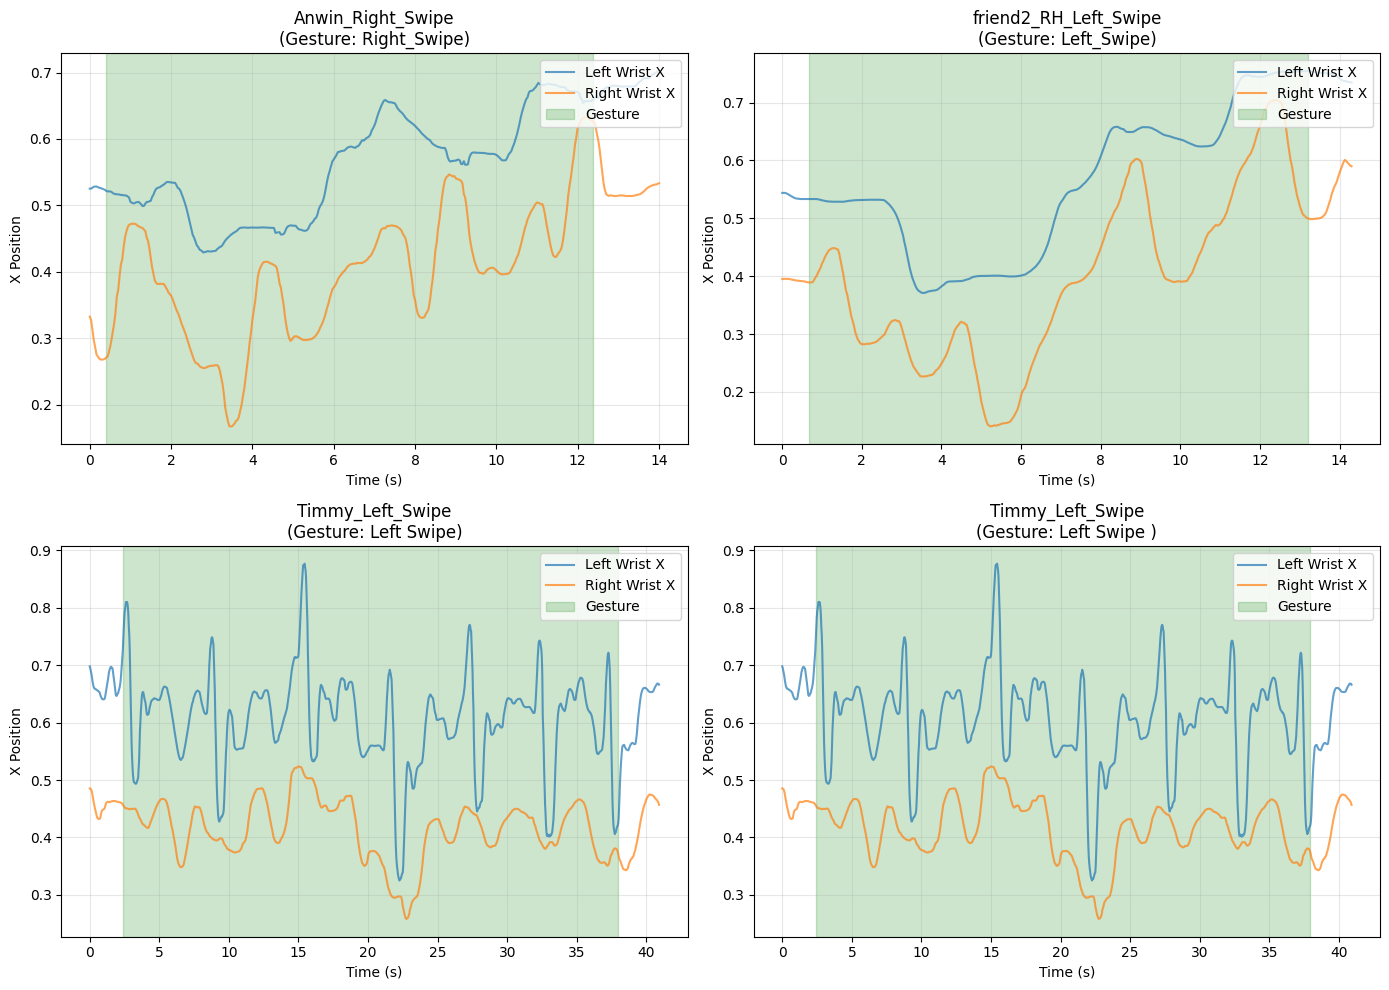

In [80]:
# Visualize wrist movements for different gestures
fig, axes = plt.subplots(2, 2, figsize=(14, 10))

# Get one video per gesture type
gestures = df['gesture'].unique()
gesture_samples = {}

for g in gestures:
    if g != 'idle':
        sample = df[df['gesture'] == g]['video_name'].iloc[0]
        gesture_samples[g] = sample

# Plot wrist X coordinates for each gesture
for idx, (gesture, video) in enumerate(list(gesture_samples.items())[:4]):
    ax = axes[idx // 2, idx % 2]
    video_df = df[df['video_name'] == video].copy()
    video_df['time_s'] = video_df['timestamp_ms'] / 1000
    
    ax.plot(video_df['time_s'], video_df['LEFT_WRIST_x'], label='Left Wrist X', alpha=0.7)
    ax.plot(video_df['time_s'], video_df['RIGHT_WRIST_x'], label='Right Wrist X', alpha=0.7)
    
    # Highlight gesture regions
    gesture_frames = video_df[video_df['gesture'] != 'idle']
    if len(gesture_frames) > 0:
        ax.axvspan(gesture_frames['time_s'].min(), gesture_frames['time_s'].max(), 
                   alpha=0.2, color='green', label='Gesture')
    
    ax.set_title(f'{video}\n(Gesture: {gesture})')
    ax.set_xlabel('Time (s)')
    ax.set_ylabel('X Position')
    ax.legend(loc='upper right')
    ax.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

In [81]:
# Compare movements between different people
print("👥 Comparing Wrist Range of Motion by Person:\n")

# Extract person name from video name
df['person'] = df['video_name'].str.extract(r'^([A-Za-z]+\d?)')[0]

for person in df['person'].unique():
    person_df = df[df['person'] == person]
    
    left_range = person_df['LEFT_WRIST_x'].max() - person_df['LEFT_WRIST_x'].min()
    right_range = person_df['RIGHT_WRIST_x'].max() - person_df['RIGHT_WRIST_x'].min()
    
    print(f"  {person}:")
    print(f"    Left wrist X range:  {left_range:.3f}")
    print(f"    Right wrist X range: {right_range:.3f}")

👥 Comparing Wrist Range of Motion by Person:

  Anwin:
    Left wrist X range:  0.330
    Right wrist X range: 0.526
  friend2:
    Left wrist X range:  0.383
    Right wrist X range: 0.564
  Timmy:
    Left wrist X range:  0.552
    Right wrist X range: 0.376
  Friend1:
    Left wrist X range:  0.184
    Right wrist X range: 0.352
  friend1:
    Left wrist X range:  0.154
    Right wrist X range: 0.304


# E03: Document Findings

## Key Findings from Data Analysis:

### 1. Framerate Differences
- Videos have different FPS → Need **resampling** to standardize

### 2. Person Position Variability
- People stand at different positions in frame → Need **normalization** relative to body center

### 3. Most Important Landmarks
- **Wrists** show highest variance (most movement during gestures)
- **Face landmarks** (eyes, ears, mouth) show low variance → Can be **removed**
- **Lower body** (knees, ankles, feet) irrelevant for hand gestures → Can be **removed**

### 4. Label Inconsistency
- Labels have different formats (Left_Swipe vs Left Swipe) → Need **standardization**

### 5. Gesture Characteristics
- **Swipe Left/Right**: Large horizontal wrist movement
- **Rotate**: Circular motion pattern

## Preprocessing Steps Needed:
1. Standardize labels
2. Resample to consistent FPS
3. Remove unnecessary landmarks (face, lower body)
4. Normalize positions relative to body center
5. Add velocity features (movement speed)

# Preprocessing

## E04: Resampling Frames

In [ ]:
def resample_data(frames, target_fps=30):
    """Resample frames to a consistent FPS using interpolation"""
    
    frames = frames.copy()
    
    # Convert timestamp to timedelta index
    frames['time'] = pd.to_timedelta(frames['timestamp_ms'], unit='ms')
    frames = frames.set_index('time')
    
    # Calculate target interval
    interval = pd.Timedelta(milliseconds=1000/target_fps)
    
    # Get numeric columns only
    numeric_cols = frames.select_dtypes(include=[np.number]).columns
    
    # Resample and interpolate
    resampled = frames[numeric_cols].resample(interval).mean().interpolate(method='linear')
    
    # Reset index
    resampled = resampled.reset_index()
    resampled['timestamp_ms'] = resampled['time'].dt.total_seconds() * 1000
    resampled = resampled.drop('time', axis=1)
    
    return resampled

# Test resampling on one video
test_video = df[df['video_name'] == df['video_name'].iloc[0]].copy()
resampled = resample_data(test_video, target_fps=30)

print(f"Original: {len(test_video)} frames")
print(f"Resampled (30 FPS): {len(resampled)} frames")